# Summary
<p>

The aim of this projet is to introduce the data visualization capabilities with Python as concrete and as consistent as possible. Major steps are data import, cleaning, slicing, plotting and mapping geo spatial data. Libraries used here are numpy, pandas, matplotlib, and folium. This project is part of the IBM Data Science certification.
</p> 

<p>
Unfortunately Folium does not show on GitHub, but is displayed with nbviewer:
<a href="https://nbviewer.jupyter.org/github/RolfChung/germany_migration/blob/master/migration_germany.ipynb" target="_blank">project on nbviewer</a> 
</p> 


<p>
Dataset Source: 
<a href="https://www.un.org/en/development/desa/population/migration/data/index.asp" target="_blank">International migration flows to and from selected countries - United Nations</a> 
    

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

This project focus on the German immigration data.

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod1Fig1-Dataset.png" align="center" width=900>
</p>


# Import packages

In [913]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from PIL import Image

plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'

import numpy as np
print("numpy version: ", np.__version__)
import scipy.stats
import math
import os
import types
from random import sample
from random import choices
import random
import warnings
import re


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


pd.show_versions()

numpy version:  1.16.5

INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 58 Stepping 9, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 0.25.1
numpy            : 1.16.5
pytz             : 2019.3
dateutil         : 2.8.0
pip              : 19.2.3
setuptools       : 41.4.0
Cython           : 0.29.13
pytest           : 5.2.1
hypothesis       : None
sphinx           : 2.2.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.1
lxml.etree       : 4.4.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.8.0
pandas_datareader: None
bs4              : 4.8.0
bottleneck       : 1.2.1
fastparquet      : None
gcsfs            : None
lxml.etree 

In [914]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


# Working directory

In [915]:
working_directory = os.getcwd()
print(working_directory )

C:\Users\gamarandor\data_science\data_science_projects\data_camp_projects\migration


In [916]:
dirpath = os.getcwd()
print(dirpath)

foldername = os.path.basename(dirpath)
print(foldername)

C:\Users\gamarandor\data_science\data_science_projects\data_camp_projects\migration
migration


# Data import

In [917]:
# migration from and to Germany 1980 to 2013
# the main focus here is put on this data
df_germany = pd.read_excel('Germany.xlsx',
                       sheet_name='Germany by Citizenship',
                       # first twenty rows are not data
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [918]:
# population of Germany from 1980 to 2018
# the main focus here is put on the migration data
# and only for special purposes like scatter plots this data is used
df_population = pd.read_excel('germany_population.xlsx', sheet_name='population')

# Basic data exploration

In [919]:
print(df_population.shape)
print(df_population.columns)
print(df_population.head())
print(df_population.info())

(39, 2)
Index(['Year', 'Population'], dtype='object')
   Year  Population
0  1980    78397483
1  1981    78418324
2  1982    78248407
3  1983    78008156
4  1984    77709213
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
Year          39 non-null int64
Population    39 non-null int64
dtypes: int64(2)
memory usage: 752.0 bytes
None


In [920]:
df_germany.shape

(383, 43)

In [921]:
col_list = df_germany.columns.to_list()
print(col_list[::4])

['Type', 'AreaName', 'DevName', 1983, 1987, 1991, 1995, 1999, 2003, 2007, 2011]


In [922]:
df_germany.head(3)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Emigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,585,...,1908,1700,1615,1184,1510,..,..,..,..,..
1,Emigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,0,...,1059,864,735,683,829,..,..,..,..,..
2,Emigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,842,...,2373,1730,1420,1312,1352,..,..,..,..,..


In [923]:
df_germany.tail(3)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
380,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,0,...,409,290,363,364,466,..,..,..,..,..
381,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,0,...,73,73,87,56,54,..,..,..,..,..
382,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,0,...,241,157,126,134,166,..,..,..,..,..


In [924]:
df_germany.info(verbose=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 43 columns):
Type        383 non-null object
Coverage    383 non-null object
OdName      383 non-null object
AREA        383 non-null int64
AreaName    383 non-null object
REG         383 non-null int64
RegName     383 non-null object
DEV         383 non-null int64
DevName     383 non-null object
1980        383 non-null int64
1981        383 non-null int64
1982        383 non-null int64
1983        383 non-null int64
1984        383 non-null int64
1985        383 non-null int64
1986        383 non-null int64
1987        383 non-null int64
1988        383 non-null int64
1989        383 non-null int64
1990        383 non-null int64
1991        383 non-null int64
1992        383 non-null int64
1993        383 non-null int64
1994        383 non-null int64
1995        383 non-null int64
1996        383 non-null int64
1997        383 non-null int64
1998        383 non-null object
1999        383 non-

In [925]:
df_germany.dtypes[:10]

Type        object
Coverage    object
OdName      object
AREA         int64
AreaName    object
REG          int64
RegName     object
DEV          int64
DevName     object
1980         int64
dtype: object

In [926]:
df_germany.select_dtypes(include='object').dtypes[:9]

Type        object
Coverage    object
OdName      object
AreaName    object
RegName     object
DevName     object
1998        object
1999        object
2000        object
dtype: object

In [927]:
df_germany.select_dtypes(include= np.number).dtypes[:7]

AREA    int64
REG     int64
DEV     int64
1980    int64
1981    int64
1982    int64
1983    int64
dtype: object

In [928]:
df_germany.describe().iloc[:7, :8]

,AREA,REG,DEV,1980,1981,1982,1983,1984
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,912.989556,1255.310705,902.250653,3850.086162,3696.093995,3312.031332,3185.621410,3959.344648
std,14.343391,1193.883048,7.032449,24799.518584,24418.606944,24458.361899,24315.988179,31751.140048
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,903.000000,914.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,908.000000,922.000000,902.000000,26.000000,29.000000,31.000000,29.000000,33.000000
75%,909.000000,925.500000,902.000000,688.000000,776.500000,771.500000,703.000000,681.500000


In [929]:
df_index = df_germany.index.values.tolist()
print(df_index[:13])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


# Data cleaning

Replace string values ".." with 0.

In [930]:
df_germany = df_germany.replace("..", 0)
df_germany.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Emigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,585,...,1908,1700,1615,1184,1510,0,0,0,0,0
1,Emigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,0,...,1059,864,735,683,829,0,0,0,0,0
2,Emigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,842,...,2373,1730,1420,1312,1352,0,0,0,0,0
3,Emigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,6,3,1,4,1,0,0,0,0,0
4,Emigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,0,...,452,456,372,464,441,0,0,0,0,0


In [931]:
df_germany.dtypes

Type        object
Coverage    object
OdName      object
AREA         int64
AreaName    object
REG          int64
RegName     object
DEV          int64
DevName     object
1980         int64
1981         int64
1982         int64
1983         int64
1984         int64
1985         int64
1986         int64
1987         int64
1988         int64
1989         int64
1990         int64
1991         int64
1992         int64
1993         int64
1994         int64
1995         int64
1996         int64
1997         int64
1998         int64
1999         int64
2000         int64
2001         int64
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
dtype: object

Drop irrelevant columns.

In [932]:
df_germany.drop(['AREA', 'REG', 'DEV', 'Coverage'], axis=1, inplace=True)

Rename columns with clearer names.

In [933]:
df_germany_countries = \
df_germany.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'})
df_germany.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_germany.head(2)

,Type,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Emigrants,Afghanistan,Asia,Southern Asia,Developing regions,585,844,1336,859,522,...,1908,1700,1615,1184,1510,0,0,0,0,0
1,Emigrants,Albania,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,1059,864,735,683,829,0,0,0,0,0


Convert all column names to strings.

In [934]:
# Are all variable names strings?
all(isinstance(column, str) for column in df_germany.columns)

False

In [935]:
df_germany.columns = list(map(str, df_germany.columns))

In [936]:
all(isinstance(column, str) for column in df_germany.columns)

True

In [937]:
# Remove spaces at the beginning and at the end of the string
df_germany.columns = df_germany.columns.str.strip()

In [938]:
df_germany.columns

Index(['Type', 'Country', 'Continent', 'Region', 'DevName', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [939]:
df_germany.set_index('Country', inplace=True)
df_germany.head(2)

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Emigrants,Asia,Southern Asia,Developing regions,585,844,1336,859,522,442,...,1908,1700,1615,1184,1510,0,0,0,0,0
Albania,Emigrants,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,1059,864,735,683,829,0,0,0,0,0


## Missing values

In [940]:
df_germany.isnull().sum()[:10]

Type         0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
dtype: int64

In [941]:
pd.isna(df_germany).sum()[:10]

Type         0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
dtype: int64

### Total migration sum per country

In [942]:
df_germany['Total'] = df_germany.sum(axis=1)

print(df_germany['Total'].head(6))
print(df_germany.columns.tolist()[-1])

Country
Afghanistan            35869
Albania                25312
Algeria                41967
Andorra                   51
Angola                  9613
Antigua and Barbuda       24
Name: Total, dtype: int64
Total


In [943]:
# check if Total is still in the index
# matches Total

def match_regex(search_term):
    matches_total = []
    for i in df_germany.index:
        # bool turns regex object into true or false
        x = bool(re.search(search_term, i))
        matches_total.append(x)
    return matches_total
 
regex_total = '^Total'

matches_total_1 = match_regex(regex_total)

df_total = df_germany[matches_total_1]
print(df_total.shape)
df_total.iloc[0:5, 0:6]

(1, 39)


,Type,Continent,Region,DevName,1980,1981
Country,,,,,,
Total,Emigrants,World,World,World,395024,426058


In [944]:
# print(df_germany.index)
# There is allready an observation in the column
# This distorts and magnifys the total
# Total is therefore dropped from the index
df_germany.drop('Total', axis=0, inplace=True)

In [945]:
# check if Total is still in the index
matches_total_2 = match_regex('regex_total')

df_total_2 = df_germany[matches_total_2]
print(df_total_2.shape)
df_total_2
# no

(0, 39)


,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,


In [946]:
# Is Gerany in the index?
matches_germ = match_regex('^Germany')
# print(matches_germ)
df_germ = df_germany[matches_germ ]
print(df_germ.shape)
df_germ
# yes
# Germany includes itself

(2, 39)


,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Germany,Emigrants,Europe,Western Europe,Developed regions,53728,55001,60227,62305,59764,58607,...,144815,155290,161105,174759,0,0,0,0,0,3081093
Germany,Immigrants,Europe,Western Europe,Developed regions,104929,104450,82337,79927,79247,82653,...,128051,103388,106014,108331,79165,85527,89438,87245,83229,6700218


In [947]:
df_germany.drop('Germany', axis=0, inplace=True)

In [948]:
# Is Germany still in the index?
matches_germ = match_regex('^Germany')
# print(matches_germ)
df_germany[matches_germ].shape
# no

(0, 39)

# Advanced data exploration

## Some slicing

In [949]:
mask_continent_eur = df_germany['Continent'] == 'Europe'
europe = df_germany[mask_continent_eur]
print(europe.shape)
print(europe.iloc[0:3, 0:6])

(86, 39)
              Type Continent           Region            DevName   1980   1981
Country                                                                       
Albania  Emigrants    Europe  Southern Europe  Developed regions      0      0
Andorra  Emigrants    Europe  Southern Europe  Developed regions      0      0
Austria  Emigrants    Europe   Western Europe  Developed regions  17195  19217


In [950]:
# a boolean mask is a selection of observations based on a condition
mask_continent_af = df_germany['Continent'] == 'Africa'
africa = df_germany[mask_continent_af]
print(africa.shape)
print(africa.iloc[0:3,0:6])

(106, 39)
              Type Continent           Region             DevName  1980  1981
Country                                                                      
Algeria  Emigrants    Africa  Northern Africa  Developing regions   842   636
Angola   Emigrants    Africa    Middle Africa  Developing regions     0     0
Benin    Emigrants    Africa   Western Africa  Developing regions    16    19


### Using operators

In [951]:
# and / & operators
mask_continent_naf_emi = \
(df_germany.Type == 'Emigrants') & (df_germany.Region =='Northern Africa')
# print(mask_continent_naf_emi)

afn_emi = df_germany[mask_continent_naf_emi]
print(afn_emi.shape)
afn_emi.iloc[0:5, 0:9]

(6, 39)


,Type,Continent,Region,DevName,1980,1981,1982,1983,1984
Country,,,,,,,,,
Algeria,Emigrants,Africa,Northern Africa,Developing regions,842,636,584,676,546
Egypt,Emigrants,Africa,Northern Africa,Developing regions,1534,1638,1719,1763,1508
Libya,Emigrants,Africa,Northern Africa,Developing regions,452,363,548,657,476
Morocco,Emigrants,Africa,Northern Africa,Developing regions,1336,1416,1726,1792,2163
Sudan,Emigrants,Africa,Northern Africa,Developing regions,197,227,268,189,209


In [952]:
# not emigrants with not operator
mask_not_emi = df_germany.Type != 'Emigrants'
immingrants_only = df_germany[mask_not_emi]
print(immingrants_only.shape)
immingrants_only.iloc[0:3, 0:7]

(190, 39)


,Type,Continent,Region,DevName,1980,1981,1982
Country,,,,,,,
Afghanistan,Immigrants,Asia,Southern Asia,Developing regions,5281,5162,2416
Albania,Immigrants,Europe,Southern Europe,Developed regions,0,0,0
Algeria,Immigrants,Africa,Northern Africa,Developing regions,741,744,555


In [953]:
df_germany['1985']

Country
Afghanistan                            442
Albania                                  0
Algeria                                618
Andorra                                  0
Angola                                   0
                                      ... 
Venezuela (Bolivarian Republic of)     193
Viet Nam                              1332
Yemen                                    0
Zambia                                   0
Zimbabwe                                 0
Name: 1985, Length: 380, dtype: int64

In [954]:
# determining a range of values between greater and smaller with or
mask_2000_greater = (df_germany['2005'] >=100)  & (df_germany['2008'] <= 3000)
greater_year2000 = df_germany[mask_2000_greater]
print(greater_year2000.shape)
greater_year2000['2005']

(176, 39)


Country
Afghanistan                           1700
Albania                                864
Algeria                               1730
Angola                                 456
Argentina                              642
                                      ... 
United Republic of Tanzania            157
Uzbekistan                             996
Venezuela (Bolivarian Republic of)     493
Yemen                                  290
Zimbabwe                               157
Name: 2005, Length: 176, dtype: int64

### Selected countries

In [955]:
japan = df_germany.loc['Japan']
japan

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Japan,Emigrants,Asia,Eastern Asia,Developed regions,2999,3241,3360,3426,3548,3461,...,5111,5423,5465,6037,0,0,0,0,0,130545
Japan,Immigrants,Asia,Eastern Asia,Developed regions,3580,3757,3733,3659,3731,4060,...,5821,5735,5737,5847,0,0,0,0,0,142234


In [956]:
df_germany[df_germany.index == 'Japan'].index.tolist()
# Japan is two times in the index

['Japan', 'Japan']

In [957]:
print(np.where( df_germany.index=='Japan')[0])
# the row numbers of Japan in the index

[ 83 274]


In [958]:
# this gives Japan with index
df_germany.iloc[84,0:6]

Type                  Emigrants
Continent                  Asia
Region             Western Asia
DevName      Developing regions
1980                       1564
1981                       1338
Name: Jordan, dtype: object

In [959]:
japan_2 = df_germany.loc['Japan', ['1980', '1981', '1982']]
japan_2

,1980,1981,1982
Country,,,
Japan,2999,3241,3360
Japan,3580,3757,3733


In [960]:
japan_i = japan[japan.Type=='Immigrants']
japan_i

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Japan,Immigrants,Asia,Eastern Asia,Developed regions,3580,3757,3733,3659,3731,4060,...,5821,5735,5737,5847,0,0,0,0,0,142234


### Slicing with string methods

In [961]:
# this condition is also called a mask
mask_1 = df_germany.index.str.contains('Korea')

df_germany.loc[mask_1, ['Type', 'Continent']]

,Type,Continent
Country,,
Democratic People's Republic of Korea,Emigrants,Asia
Republic of Korea,Emigrants,Asia
Democratic People's Republic of Korea,Immigrants,Asia
Republic of Korea,Immigrants,Asia


In [962]:
np.where(df_germany.index == "Democratic People's Republic of Korea")[0]
# get row numbers

array([ 44, 235], dtype=int64)

In [963]:
# str.startswith(str, beg=0,end=len(string))
# this gives all countries in the index starting with Mo
mask_2 = df_germany.index.str.startswith('Mo')
print(mask_2[50:55])

starts_mo = df_germany.iloc[mask_2]
starts_mo.iloc[0:3, 0:5]

[False False False False False]


,Type,Continent,Region,DevName,1980
Country,,,,,
Monaco,Emigrants,Europe,Western Europe,Developed regions,0
Mongolia,Emigrants,Asia,Eastern Asia,Developing regions,0
Montenegro,Emigrants,Europe,Southern Europe,Developed regions,0


In [964]:
# this gives all countries in the index starting with Da
mask_de = df_germany.index.str.startswith('De')
print(mask_de[50:55])

starts_de = df_germany.iloc[mask_de]
starts_de.iloc[0:3, 0:5]

[False False False False False]


,Type,Continent,Region,DevName,1980
Country,,,,,
Democratic People's Republic of Korea,Emigrants,Asia,Eastern Asia,Developing regions,76
Democratic Republic of the Congo,Emigrants,Africa,Middle Africa,Developing regions,97
Denmark,Emigrants,Europe,Northern Europe,Developed regions,1059


### Slicing with Regex

In [965]:
# df_germany.index
# all starts with Dem
matches_dem = []
for i in df_germany.index:
     # bool turns regex object into true or false
    x = bool(re.match("^Dem", i))
    matches_dem.append(x)

df_germany.iloc[matches_dem, 0:6]

,Type,Continent,Region,DevName,1980,1981
Country,,,,,,
Democratic People's Republic of Korea,Emigrants,Asia,Eastern Asia,Developing regions,76,131
Democratic Republic of the Congo,Emigrants,Africa,Middle Africa,Developing regions,97,103
Democratic People's Republic of Korea,Immigrants,Asia,Eastern Asia,Developing regions,156,130
Democratic Republic of the Congo,Immigrants,Africa,Middle Africa,Developing regions,178,243


In [966]:
# all starts with K
matches_K = []
for i in df_germany.index:
     # bool turns regex object into true or false
    x = bool(re.search("^K", i))
    matches_K.append(x)
    
df_K = df_germany[matches_K]

print(df_K.shape)
df_K.iloc[:, 0:6]

(10, 39)


,Type,Continent,Region,DevName,1980,1981
Country,,,,,,
Kazakhstan,Emigrants,Asia,Central Asia,Developing regions,0,0
Kenya,Emigrants,Africa,Eastern Africa,Developing regions,136,141
Kiribati,Emigrants,Oceania,Micronesia,Developing regions,0,0
Kuwait,Emigrants,Asia,Western Asia,Developing regions,0,0
Kyrgyzstan,Emigrants,Asia,Central Asia,Developing regions,0,0
Kazakhstan,Immigrants,Asia,Central Asia,Developing regions,0,0
Kenya,Immigrants,Africa,Eastern Africa,Developing regions,191,221
Kiribati,Immigrants,Oceania,Micronesia,Developing regions,0,0
Kuwait,Immigrants,Asia,Western Asia,Developing regions,0,0


In [967]:
# ends with t
matches_t = []
for i in df_germany.index:
    # bool turns regex object into true or false
    x = bool(re.search("[t]$", i))
    matches_t.append(x)
    
df_t = df_germany[matches_t]
print(df_t.shape)
df_t.iloc[0:5, 0:6]

(4, 39)


,Type,Continent,Region,DevName,1980,1981
Country,,,,,,
Egypt,Emigrants,Africa,Northern Africa,Developing regions,1534,1638
Kuwait,Emigrants,Asia,Western Asia,Developing regions,0,0
Egypt,Immigrants,Africa,Northern Africa,Developing regions,2318,2041
Kuwait,Immigrants,Asia,Western Asia,Developing regions,0,0


In [968]:
# matches Total
matches_total = []
for i in df_germany.index:
    # bool turns regex object into true or false
    x = bool(re.search("^Total", i))
    matches_total.append(x)
    
df_total = df_germany[matches_total]
print(df_total.shape)
df_total.iloc[0:5, 0:6]

(0, 39)


,Type,Continent,Region,DevName,1980,1981
Country,,,,,,


## Value counts

In [969]:
type_vc = df_germany.Type.value_counts()
print(type_vc)

Emigrants     190
Immigrants    190
Name: Type, dtype: int64


In [970]:
continent_vc = df_germany.Continent.value_counts()
print(continent_vc)

Africa                             106
Asia                                93
Europe                              86
Latin America and the Caribbean     66
Oceania                             24
Northern America                     4
World                                1
Name: Continent, dtype: int64


In [971]:
region_vc = df_germany.Region.value_counts()
print(region_vc[:10])

Eastern Africa        34
Western Asia          34
Western Africa        32
Southern Europe       30
Caribbean             26
South America         24
South-Eastern Asia    22
Eastern Europe        20
Northern Europe       20
Middle Africa         18
Name: Region, dtype: int64


In [972]:
dev_vc = df_germany.DevName.value_counts()
print(dev_vc )

Developing regions    283
Developed regions      96
World                   1
Name: DevName, dtype: int64


## Group By

is embedded into the split-apply-combine workflow.

<ul>
  <li>Split the data into groups.</li>
  <li>Apply an aggregate function like sum or mean.</li>
  <li>Combine the outcomes of the aggregation into a data structure like a data frame.</li>
</ul> 



In [973]:
years_selected = np.arange(1981,1995,2).astype('str')
print(years_selected )

cont_gb_s = df_germany.groupby('Continent')[years_selected].sum()
cont_gb_s

['1981' '1983' '1985' '1987' '1989' '1991' '1993']


,1981,1983,1985,1987,1989,1991,1993
Continent,,,,,,,
Africa,28189,25581,32656,28424,36822,70460,91793
Asia,232184,197574,224708,195673,226416,245767,269822
Europe,524054,367626,393686,464890,773714,672152,1002229
Latin America and the Caribbean,11788,11495,10883,11451,14397,18411,17441
Northern America,30928,29480,33030,32557,33055,37176,34721
Oceania,2682,2167,2344,2285,2701,4110,4198
World,270,272,805,1280,5269,1595,2180


In [974]:
reg_gb_m = df_germany.groupby('Region')[years_selected].mean()
reg_gb_m[:5]

,1981,1983,1985,1987,1989,1991,1993
Region,,,,,,,
Australia and New Zealand,670.500000,541.750000,586.000000,571.250000,675.250000,764.500000,758.500000
Caribbean,10.923077,11.192308,12.076923,15.192308,23.307692,88.038462,70.192308
Central America,107.187500,95.687500,108.625000,113.875000,114.875000,139.250000,135.062500
Central Asia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2531.600000
Eastern Africa,69.647059,77.500000,139.794118,95.558824,160.470588,290.911765,241.441176


In [975]:
type_med = df_germany.groupby('Type')[years_selected].median()
type_med

,1981,1983,1985,1987,1989,1991,1993
Type,,,,,,,
Emigrants,22.0,28.5,26.5,24.0,29.0,94.0,240.0
Immigrants,35.0,30.0,32.0,38.5,55.0,153.0,432.0


# Data visualization

In [976]:
years = list(map(str, range(1980, 2014)))
years[:5]

['1980', '1981', '1982', '1983', '1984']

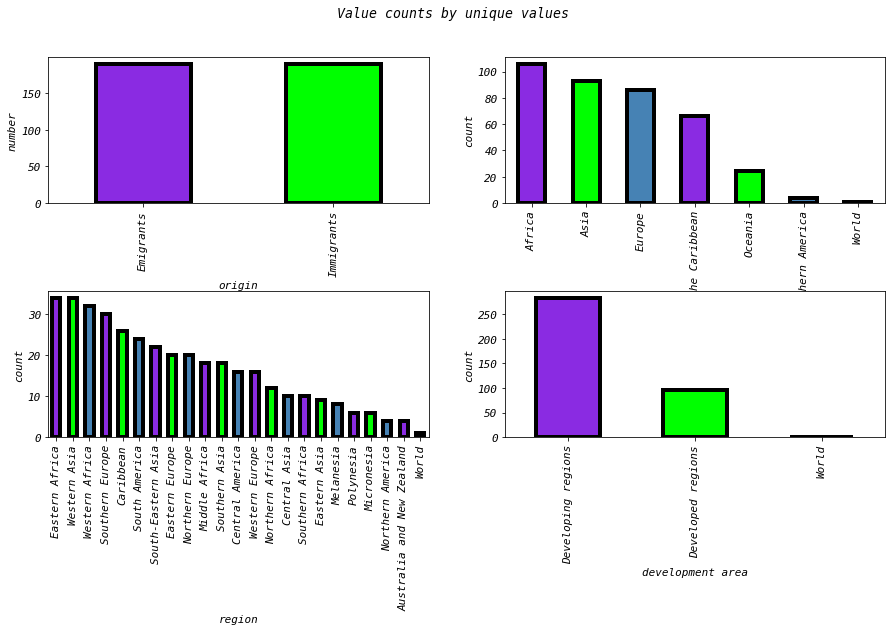

In [977]:
fig, axes= plt.subplots(2,2, figsize=(15,7))
fig.subplots_adjust(hspace=0.6, wspace=0.2)
fig.suptitle("Value counts by unique values")

type_vc.plot(kind='bar', ax=axes[0,0], edgecolor='black', 
             linewidth=4, color=['blueviolet', 'lime', 'steelblue'])
axes[0,0].set_xlabel('origin')
axes[0,0].set_ylabel('number')

continent_vc.plot(kind='bar', ax=axes[0,1], edgecolor='black', linewidth=4, 
             color=['blueviolet', 'lime', 'steelblue'])
axes[0,1].set_xlabel('continent')
axes[0,1].set_ylabel('count')


region_vc.plot(kind='bar', ax=axes[1,0], edgecolor='black', linewidth=4, 
               color=['blueviolet', 'lime', 'steelblue'])
axes[1,0].set_ylabel('count')
axes[1,0].set_xlabel('region')

dev_vc.plot(kind='bar', edgecolor='black', ax=axes[1,1], linewidth=4, 
            color=['blueviolet', 'lime', 'steelblue'])
axes[1,1].set_ylabel('count')
axes[1,1].set_xlabel('development area')

plt.show()

## Total migration

In [978]:
total_type = df_germany.groupby('Type')['Total'].sum()
print(total_type)

Type
Emigrants     13505443
Immigrants    15539735
Name: Total, dtype: int64


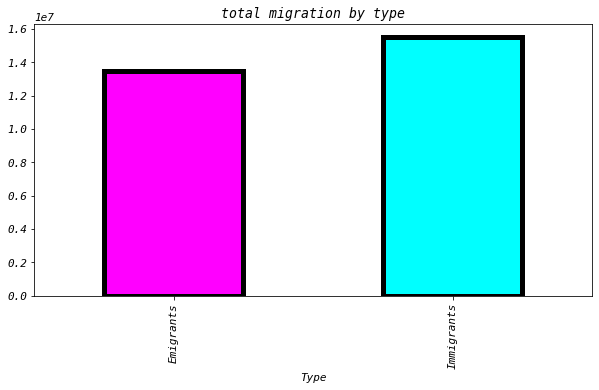

In [979]:
total_type.plot.bar(figsize=(10,5), edgecolor='black', color=['magenta', 'cyan'], linewidth=5,
                    title="total migration by type")
plt.show()

### Total immigration by countries

In [980]:
only_immigration = df_germany.loc[df_germany['Type'] == 'Immigrants']
print(type(only_immigration))
print(only_immigration.shape)
total_immigration = df_germany.loc[df_germany['Type'] == 'Immigrants', 'Total'].sum()
print(total_immigration)

<class 'pandas.core.frame.DataFrame'>
(190, 39)
15539735


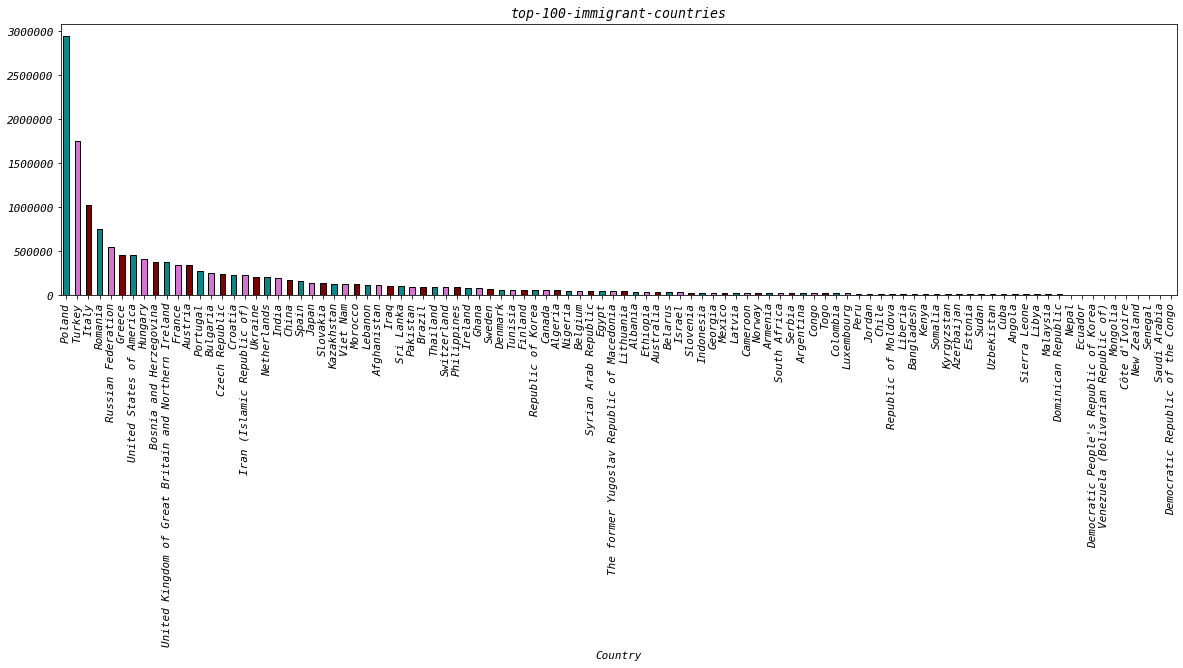

In [981]:
only_immigration['Total'].sort_values(ascending=False)[:100].plot.bar(figsize=(20,5),
                                                            edgecolor='black',
                                                            color=['darkcyan', 'orchid', 'maroon'],
                                                            linewidth=1, 
                                                            title="top-100-immigrant-countries")
plt.show()





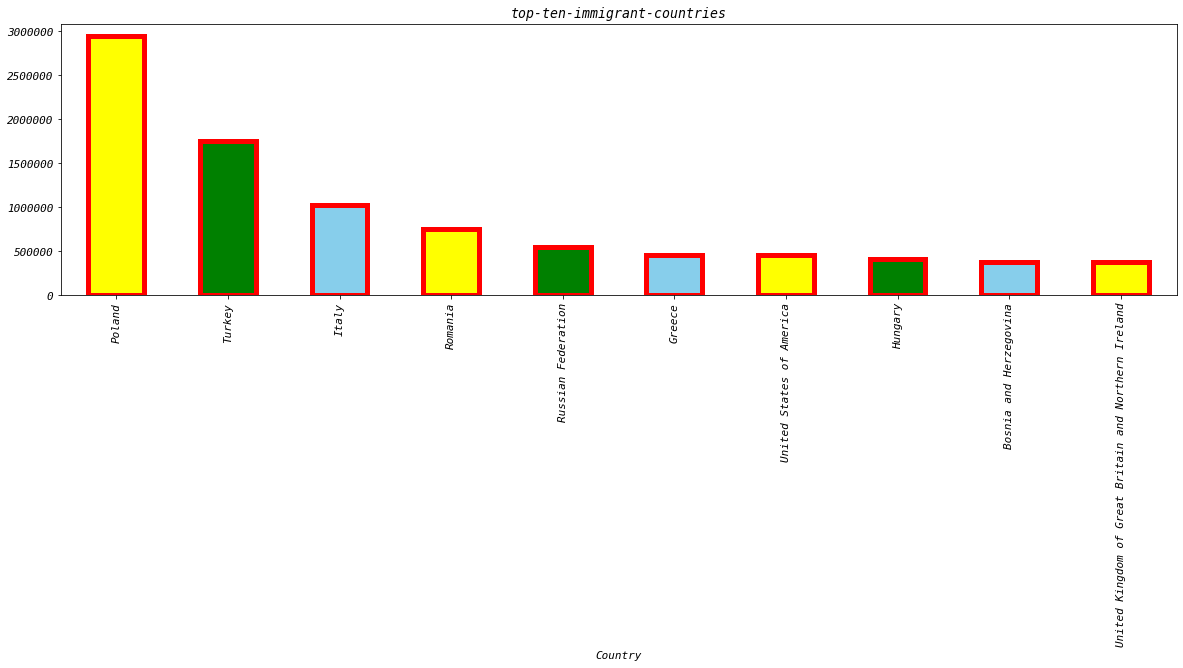

In [982]:
only_immigration['Total'].sort_values(ascending=False)[:10].plot.bar(figsize=(20,5),
                                                            edgecolor='red',
                                                            color=['yellow', 'green', 'skyblue'],
                                                            linewidth=5, 
                                                            title="top-ten-immigrant-countries")
plt.show()

#### 10 lowest immingrant countries

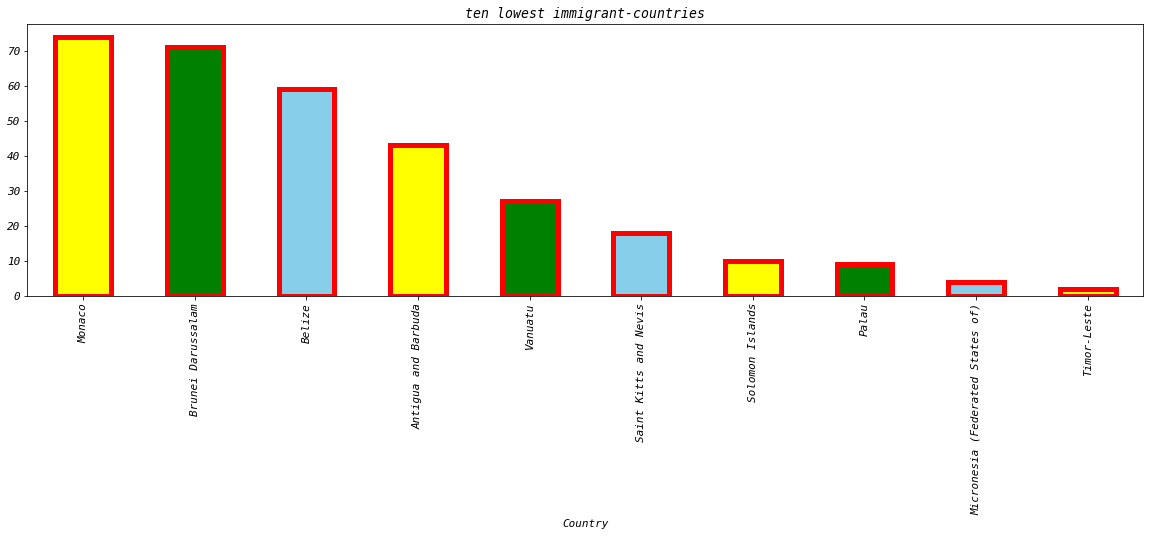

In [983]:
n_observe = len(only_immigration['Total'])

only_immigration['Total'].sort_values(ascending=False)\
[n_observe -10:n_observe].plot.bar( figsize=(20,5),
                                    edgecolor='red',
                                    color=['yellow', 'green', 'skyblue'],
                                    linewidth=5, 
                                    title="ten lowest immigrant-countries")
plt.show()

### Total emigration

In [984]:
only_emmigration = df_germany.loc[df_germany['Type'] == 'Emigrants']
total_emmigration = df_germany.loc[df_germany['Type'] == 'Emigrants', 'Total'].sum()
print(only_emmigration.shape)
print(total_emmigration)
# print(only_emmigration.head(2))

(190, 39)
13505443


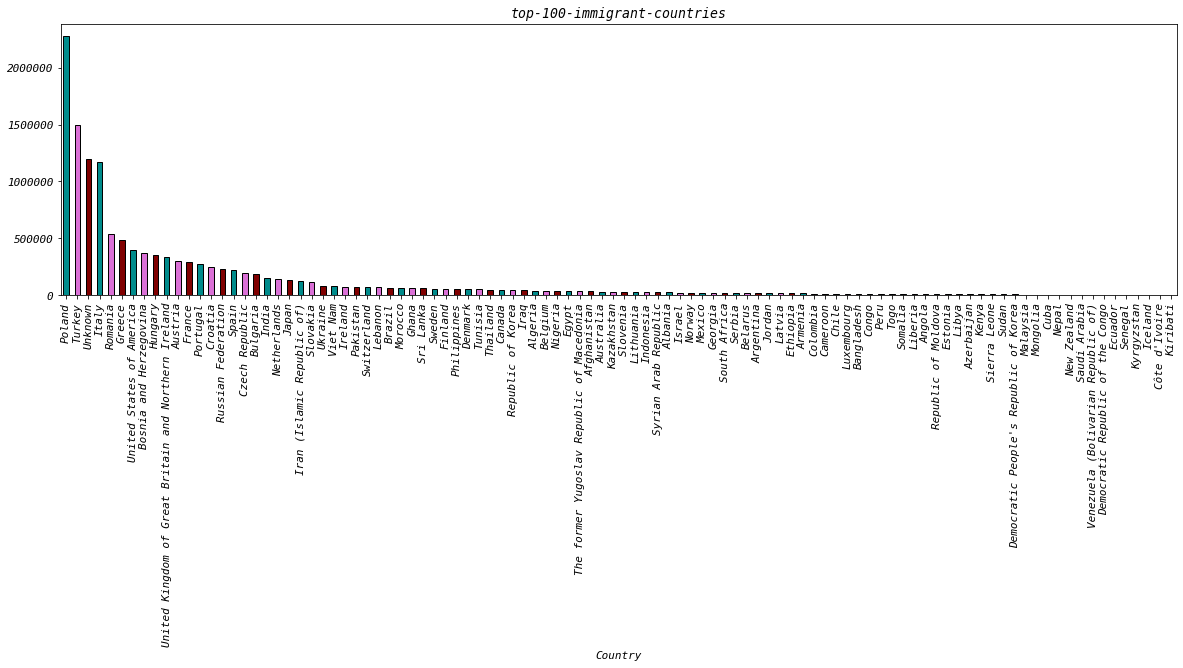

In [985]:
only_emmigration['Total'].sort_values(ascending=False)[:100].plot.bar(figsize=(20,5),
                                                            edgecolor='black',
                                                            color=['darkcyan', 'orchid', 'maroon'],
                                                            linewidth=1, 
                                                            title="top-100-immigrant-countries")
plt.show()


There seems to be a relationship between immigration and emmigration countries, which is worthwile to explore further.

#### Top-ten-emigration countries

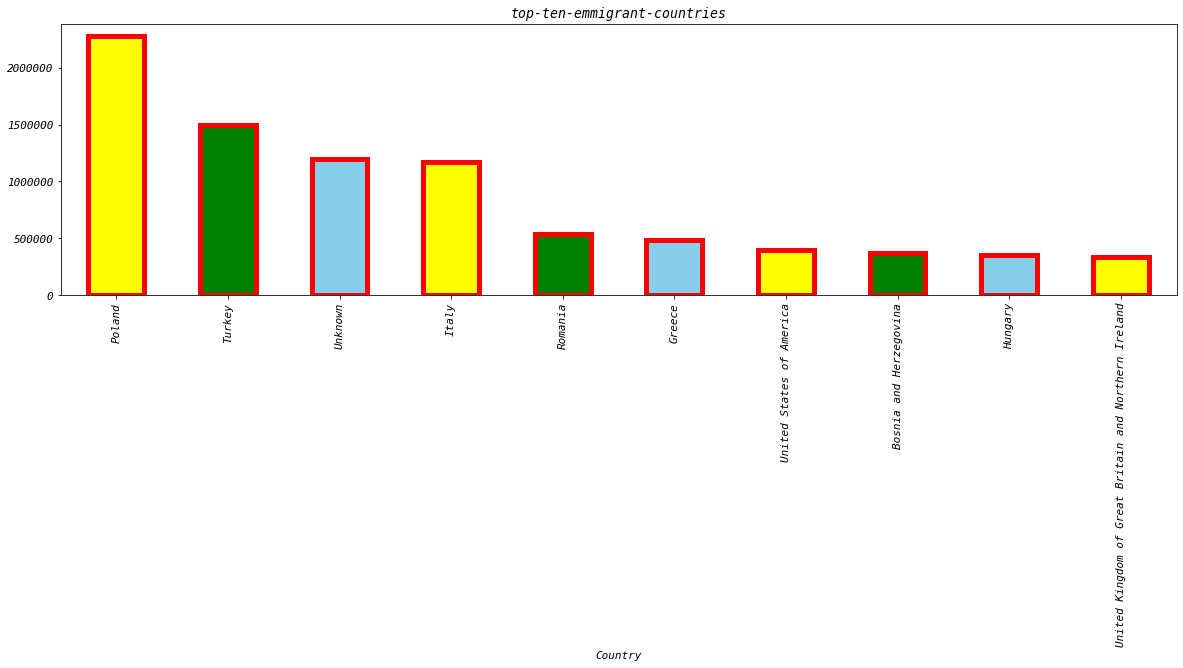

In [986]:
only_emmigration['Total'].sort_values(ascending=False)[:10].plot.bar(figsize=(20,5),
                                                            edgecolor='red',
                                                            color=['yellow', 'green', 'skyblue'],
                                                            linewidth=5, 
                                                            title="top-ten-emmigrant-countries")
plt.show()

#### Ten lowest emmigrant-countries

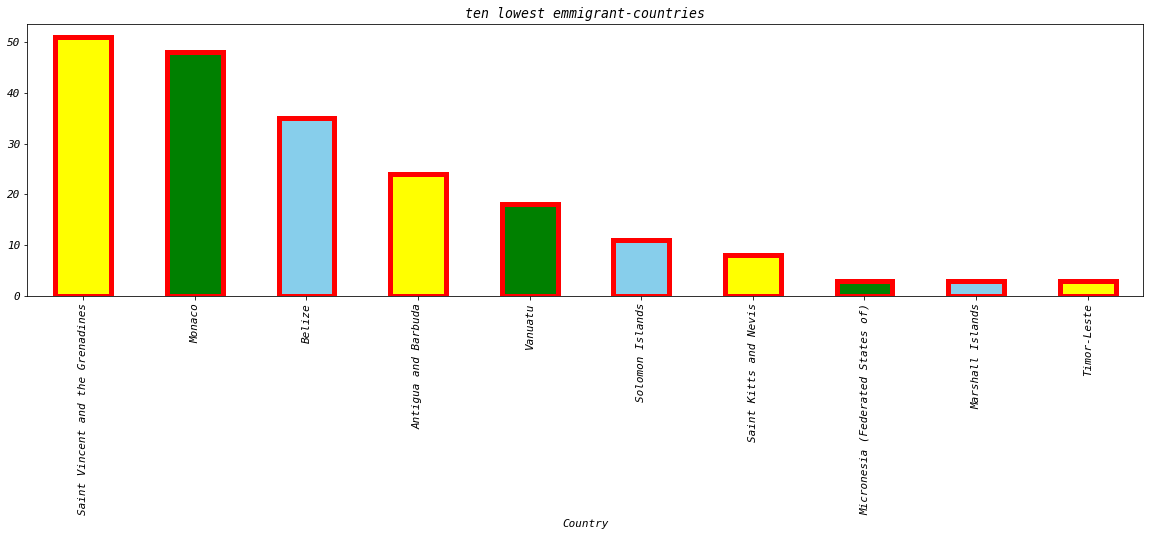

In [987]:
only_emmigration['Total'].sort_values(ascending=False)[n_observe -10:n_observe].\
plot.bar(figsize=(20,5),
        edgecolor='red',
        color=['yellow', 'green', 'skyblue'],
        linewidth=5, 
        title="ten lowest emmigrant-countries")
plt.show()

#### Net migration

In [988]:
net_migration = total_immigration - total_emmigration
print("Net migration: ", net_migration)

Net migration:  2034292


#### Max migration

In [989]:
immi_max = only_immigration.Total.max()
print(immi_max)

immi_index = np.where(only_immigration.Total==immi_max)[0]
print(immi_index)

2941797
[132]


In [990]:
only_immigration.iloc[immi_index, :]
# country with highest immigration to Germany

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Poland,Immigrants,Europe,Eastern Europe,Developed regions,41276,91418,37111,40189,67931,72151,...,147716,152733,140870,119867,0,0,0,0,0,2941797


## Total immigration over time

In [991]:
# check if the immigration sum of 1980
only_immigration_Total = only_immigration['Total'] 
# print(only_immigration_Total.head())
only_immigration.loc[:, '1980']
only_immigration.loc[:, '1980'].sum()

579606

In [992]:
immi_years_index = only_immigration.transpose()[4:only_immigration.shape[1]-1]
# immi_years_index.columns
# immi_years_index.index
immi_years_index['totalImmigration_year'] = immi_years_index.sum(axis=1)
# print(immi_years_index.head())
totalImmigration_year = immi_years_index['totalImmigration_year']
print(totalImmigration_year[:10])
print(len(totalImmigration_year))
# the immigration sum of 1980 in this df is identical to the one above

1980    579606.0
1981    459038.0
1982    294089.0
1983    252834.0
1984    307544.0
1985    367605.0
1986    438957.0
1987    433153.0
1988    584544.0
1989    696635.0
Name: totalImmigration_year, dtype: float64
34


In [993]:
# excluding none year columns
# and get years values
len(only_immigration.iloc[:, 5:])
print(only_immigration.shape)
# selecting year cols
year_columns = only_immigration.columns[4:only_immigration.shape[1]-1].astype('int').tolist()
print(len(year_columns))
print(year_columns[:10])

(190, 39)
34
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]


In [994]:

# constructing a data frame for ts
# create df
immigration_time_series = pd.DataFrame({'years':year_columns , 'totals':totalImmigration_year})
immigration_time_series.set_index('years', inplace=True)
# check 
immigration_time_series.head()

,totals
years,
1980,579606.0
1981,459038.0
1982,294089.0
1983,252834.0
1984,307544.0


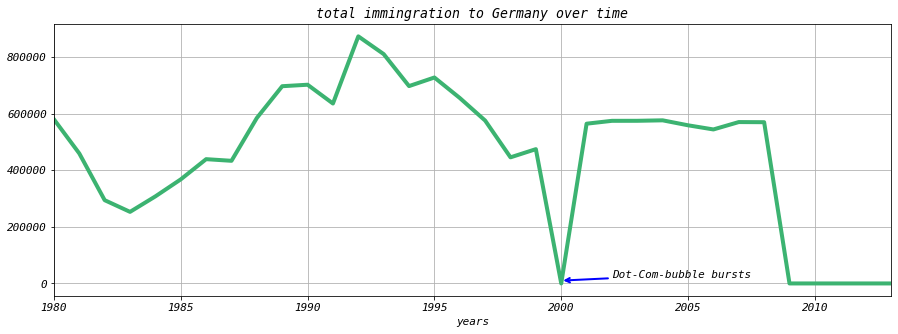

In [995]:
immigration_time_series.plot(legend=False, figsize=(15, 5), 
                             title="total immingration to Germany over time",
                             linewidth = 4, color='mediumseagreen', grid=True)
plt.annotate('Dot-Com-bubble bursts',  # s: str. Will leave it blank for no text
             xy=(2000, 10000),          
             xytext=(2002, 20000),  
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )
plt.show()
# The peak around 1995 could be caused by the war on the Balkans

#### Total emigration over time

In [996]:
emmi_years_index = only_emmigration.transpose()[4:only_emmigration.shape[1]-1]
# emmi_years_index.columns
# emmi_years_index.index
emmi_years_index['totalemmigration_year'] = emmi_years_index.sum(axis=1)
# print(emmi_years_index.head())
totalEmmigration_year = emmi_years_index['totalemmigration_year']
print(totalEmmigration_year[:10])
print(len(totalEmmigration_year))

1980    341296.0
1981    371057.0
1982    385814.0
1983    381361.0
1984    505055.0
1985    330507.0
1986    314521.0
1987    303407.0
1988    326887.0
1989    395739.0
Name: totalemmigration_year, dtype: float64
34


In [997]:
# constructiong a data frame for ts
# create df
emmigration_time_series = pd.DataFrame({'years':year_columns , 'totals':totalEmmigration_year})
emmigration_time_series.set_index('years', inplace=True)
# check 
emmigration_time_series.head()

,totals
years,
1980,341296.0
1981,371057.0
1982,385814.0
1983,381361.0
1984,505055.0


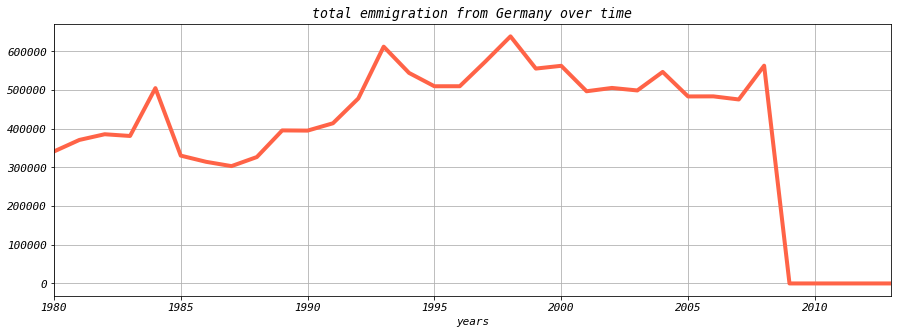

In [998]:
emmigration_time_series.plot(legend=False, figsize=(15, 5), 
                             title="total emmigration from Germany over time",
                             linewidth = 4, color='tomato', grid=True)

plt.show()
# looks similar like immigration but is not. It seems immigration and emigration are moving closely together

In [999]:
# this useful displaying all rows
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
   # print(only_immigration[:100])


### Net migration per year

In [1000]:
imem_years = pd.DataFrame({'Immigration': totalImmigration_year, 'Emigration': totalEmmigration_year})
imem_years['net_migration'] = imem_years.Immigration  - imem_years.Emigration
imem_years.index = imem_years.index.astype(int)
imem_years.head()


,Immigration,Emigration,net_migration
1980,579606.0,341296.0,238310.0
1981,459038.0,371057.0,87981.0
1982,294089.0,385814.0,-91725.0
1983,252834.0,381361.0,-128527.0
1984,307544.0,505055.0,-197511.0


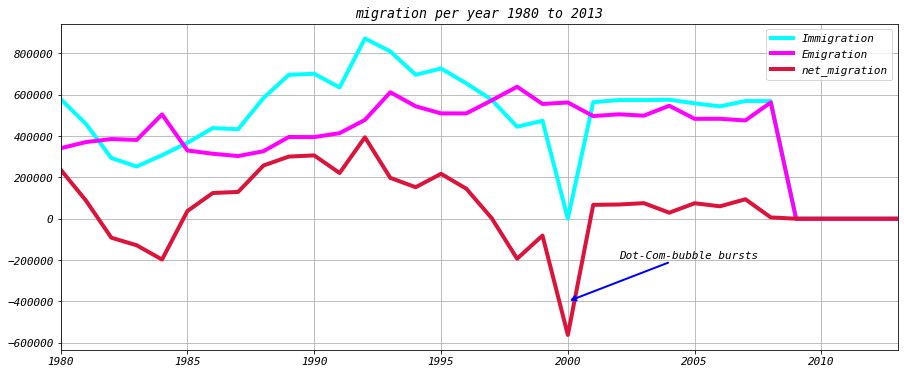

In [1001]:
imem_years.plot(figsize=(15,6), linewidth=4, color=['cyan', 'magenta', 'crimson'],
               title='migration per year 1980 to 2013', grid=True)

plt.annotate('Dot-Com-bubble bursts',  # s: str. Will leave it blank for no text
             xy=(2000, -400000),          
             xytext=(2002, -190000),  
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )
plt.show()

In [1002]:
total_imi  = \
df_germany.loc[df_germany.Type == 'Immigrants', : ].sort_values(['Total'], ascending=False, axis=0)
# print(total_imi.index)
# print(total_imi.head())
# get the top 5 entries
imi_top5 = total_imi.head()

# transpose the dataframe
top5_imi = imi_top5[years].transpose()
top5_imi.index.set_names('year', inplace=True)
top5_imi.head()

Country,Poland,Turkey,Italy,Romania,Russian Federation
year,,,,,
1980,41276,213258,86585,5001,1761
1981,91418,84583,65285,5375,1498
1982,37111,43137,41444,4982,1522
1983,40189,28178,35712,4325,1284
1984,67931,34536,37514,4648,1236


In [1003]:
total_emi = \
df_germany.loc[df_germany.Type == 'Emigrants', : ].sort_values(['Total'], ascending=False, axis=0)

# get the top 5 entries
emi_top5 = total_emi.head()

# transpose the dataframe
top5_emi = emi_top5[years].transpose()
top5_emi.index.set_names('year', inplace=True)
top5_emi.head()

Country,Poland,Turkey,Unknown,Italy,Romania
year,,,,,
1980,27927,71444,214,77845,2382
1981,49021,71615,270,81139,2152
1982,34120,87579,279,81899,2270
1983,36333,100977,272,71639,2273
1984,52859,213891,308,61627,2301


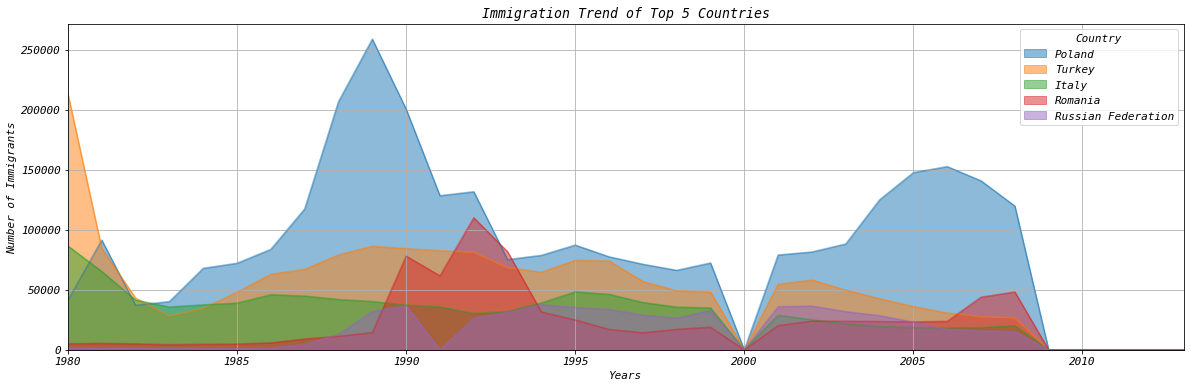

In [1004]:
top5_imi.index = top5_imi.index.map(int) # let's change the index values of df_top5 to type integer for plotting
top5_imi.plot(kind='area', 
             stacked=False,
             figsize=(20, 6),
             grid=True
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [1005]:
low_imi  = \
df_germany.loc[df_germany.Type == 'Immigrants', : ].sort_values(['Total'], ascending=True, axis=0)

# get the top 5 entries
low_imi_top5 = low_imi.head()

# transpose the dataframe
low_imi_top5= low_imi_top5[years].transpose()
low_imi_top5.index.set_names('year', inplace=True)
low_imi_top5.head()

Country,Timor-Leste,Micronesia (Federated States of),Palau,Solomon Islands,Saint Kitts and Nevis
year,,,,,
1980,0,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


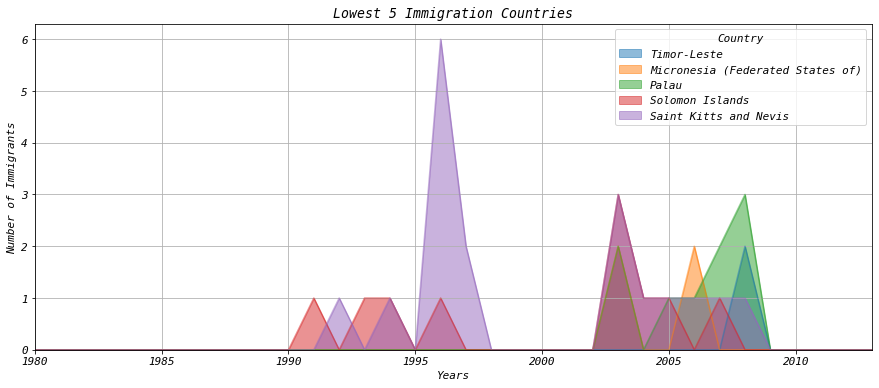

In [1006]:
low_imi_top5.index = low_imi_top5.index.map(int)

low_imi_top5.plot(kind='area', 
             stacked=False,
             figsize=(15, 6),
             grid=True
             )

plt.title('Lowest 5 Immigration Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [1007]:
total_emi  = \
df_germany.loc[df_germany.Type == 'Emigrants', : ].sort_values(['Total'], ascending=False, axis=0)

# get the top 5 entries
emi_top5 = total_emi.head()

# transpose the dataframe
top5_emi = emi_top5[years].transpose()
top5_emi.index.set_names('year', inplace=True)
top5_emi.head()

Country,Poland,Turkey,Unknown,Italy,Romania
year,,,,,
1980,27927,71444,214,77845,2382
1981,49021,71615,270,81139,2152
1982,34120,87579,279,81899,2270
1983,36333,100977,272,71639,2273
1984,52859,213891,308,61627,2301


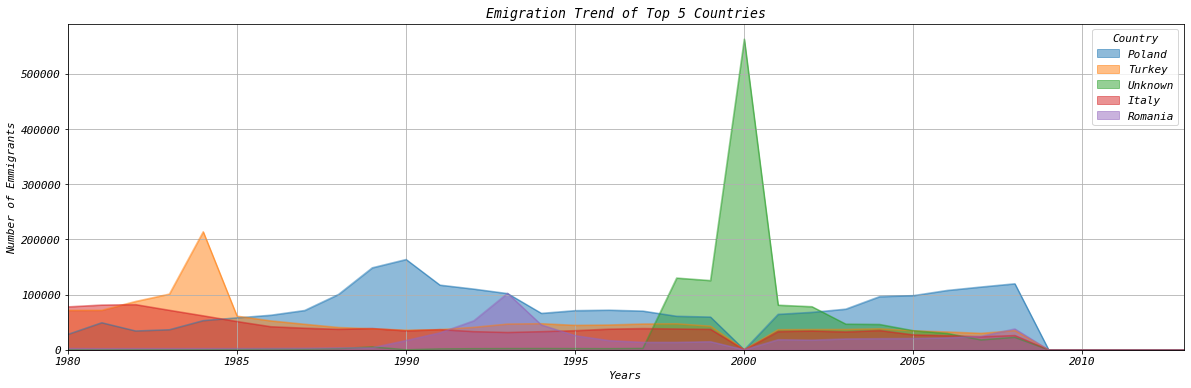

In [1008]:
top5_emi.index = top5_emi.index.map(int) # let's change the index values of df_top5 to type integer for plotting
top5_emi.plot(kind='area',  stacked=False, figsize=(20, 6), grid=True)

plt.title('Emigration Trend of Top 5 Countries')
plt.ylabel('Number of Emmigrants')
plt.xlabel('Years')

plt.show()

### Compare immigration from Poland and Turkey

In [1009]:
years_int = [int(i) for i in years]
df_germany.columns
germimi = df_germany[df_germany.Type=='Immigrants']
df_PT = germimi.loc[['Poland', 'Turkey'], years].transpose()

df_PT.head()

Country,Poland,Turkey
1980,41276,213258
1981,91418,84583
1982,37111,43137
1983,40189,28178
1984,67931,34536


### Boxplot

<img src="boxplot.png" style="width:800px; height:500px" title="Boxplot explained" alt="Flower">

In [1010]:
df_PT.describe()

Country,Poland,Turkey
count,34.000000,34.000000
mean,86523.441176,51706.558824
std,62524.343519,40047.560222
min,0.000000,0.000000
25%,47522.750000,28813.500000
50%,78889.000000,49476.000000
75%,123748.250000,72724.500000
max,258956.000000,213258.000000


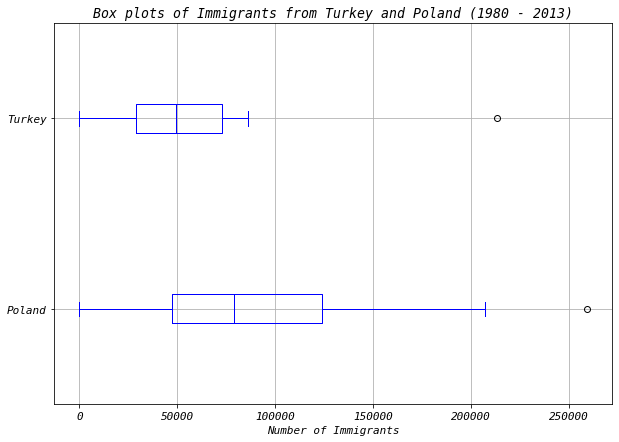

In [1011]:
# horizontal box plots
df_PT.plot(kind='box', figsize=(10, 7), color='blue', vert=False, grid = True)

plt.title('Box plots of Immigrants from Turkey and Poland (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

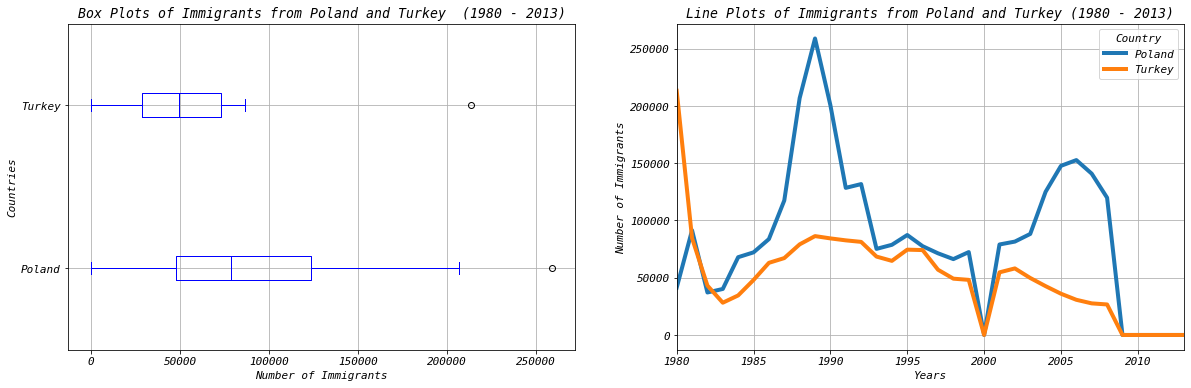

In [1012]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_PT.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0, grid=True) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from Poland and Turkey  (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_PT.plot(kind='line', figsize=(20, 6), ax=ax1, grid=True, linewidth=4) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from Poland and Turkey (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

## Group by categorical variables

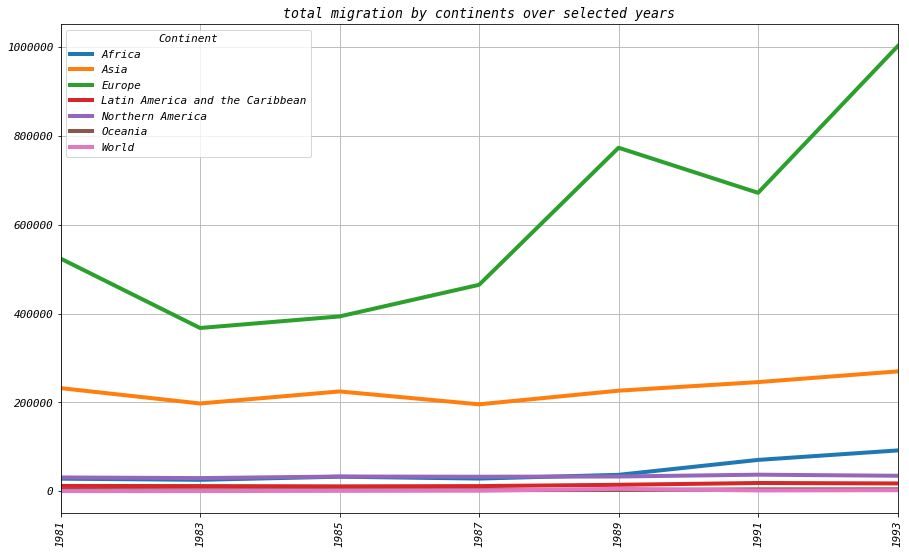

In [1013]:
# transpose swaps index continents to columns
cont_gb_s.transpose().plot( figsize=(15,9), linewidth=4, 
                            title="total migration by continents over selected years", rot=90, grid=True)
plt.show()

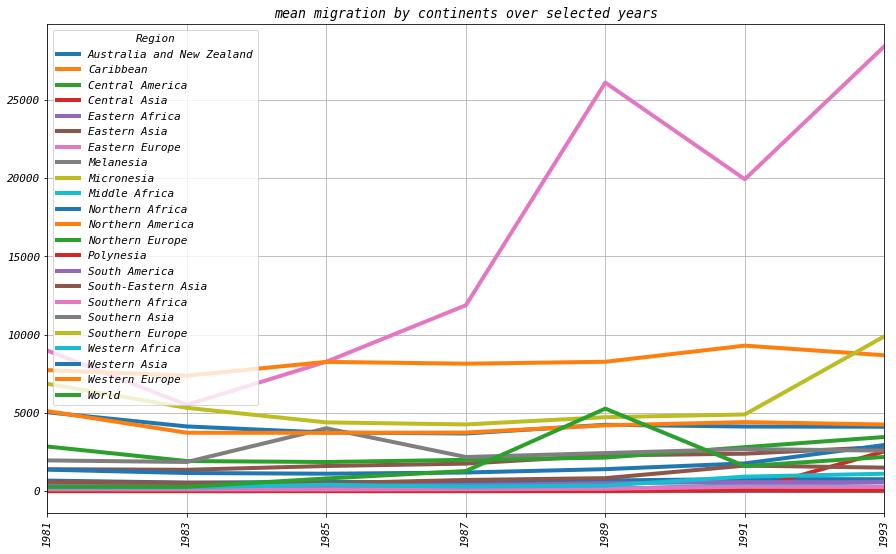

In [1014]:
# transpose swaps index continents to columns
reg_gb_m.transpose().plot( figsize=(15,9), linewidth=4, 
                            title="mean migration by continents over selected years", rot=90, grid=True)
plt.show()

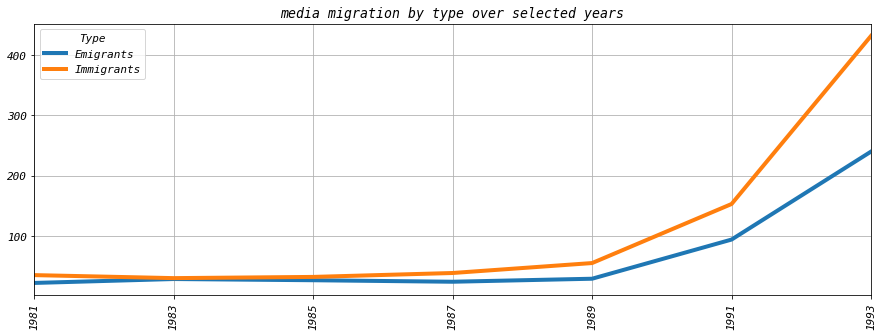

In [1015]:
type_med.transpose().plot( figsize=(15,5), linewidth=4, 
                           title="media migration by type over selected years", rot=90, grid=True)
plt.show()

## Group by continent plotted with pie charts

In [1016]:
# group countries by continents and apply sum() function 
df_continents = df_germany.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_continents.groupby('Continent', axis=0)))

df_continents.iloc[:,:5]

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984
Continent,,,,,
Africa,29529,28189,26455,25581,30887
Asia,369588,232184,202906,197574,325556
Europe,476119,524054,405216,367626,410814
Latin America and the Caribbean,11229,11788,12531,11495,11371
Northern America,31280,30928,30129,29480,31519
Oceania,2943,2682,2387,2167,2144
World,214,270,279,272,308


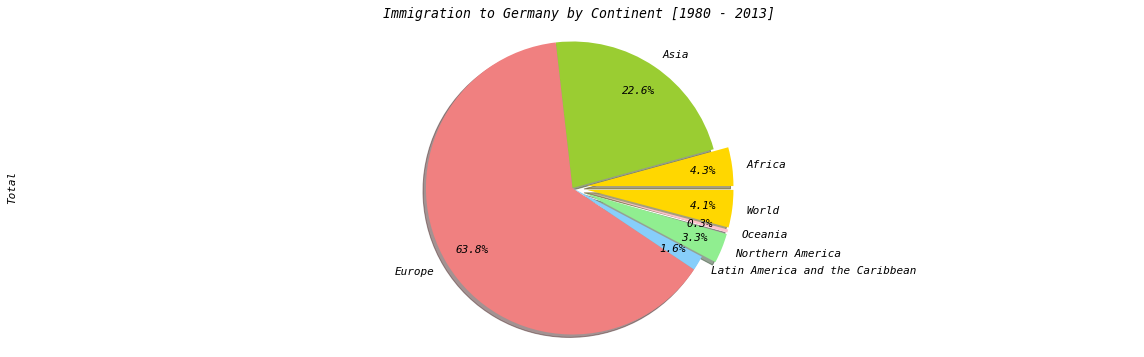

In [1017]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(20, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=0,     
                            shadow=True,
                            pctdistance=0.8,
                            explode=explode_list, # 'explode' lowest 3 continents
                            colors=colors_list
                            )

plt.title('Immigration to Germany by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

## Migration from selected origins

### Afghanistan

In [1018]:
afghanistan_i = df_germany.loc['Afghanistan']
afghanistan_i = afghanistan_i[afghanistan_i.Type == 'Immigrants']
afghanistan_i.head()

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Asia,Southern Asia,Developing regions,5281,5162,2416,846,1081,2238,...,1600,1505,1359,1855,0,0,0,0,0,113314


In [1019]:
afghanistan_ts = afghanistan_i.iloc[:, 4:len(df_germany)].transpose()

print(type(afghanistan_ts))
print(afghanistan_ts.shape)

# rename column
afghanistan_ts.columns = ['immigrant_n']

# transpose makes it necessary convert to integer again
afghanistan_ts = afghanistan_ts.astype('int')

# df.reset_index(level=0, inplace=True)
afghanistan_ts.reset_index(level=0, inplace=True)

print(afghanistan_ts.tail())

<class 'pandas.core.frame.DataFrame'>
(35, 1)
    index  immigrant_n
30   2010            0
31   2011            0
32   2012            0
33   2013            0
34  Total       113314


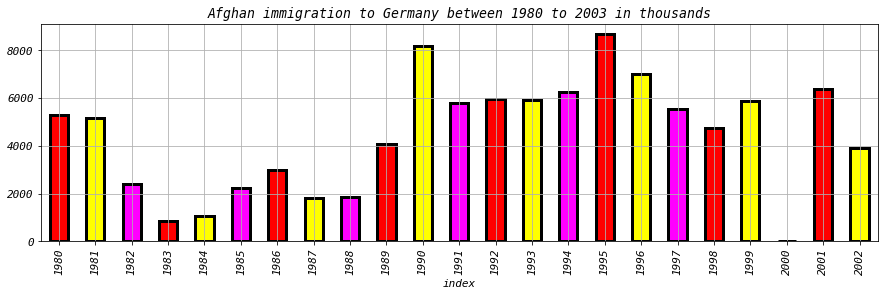

In [1020]:
afghanistan_ts[0:23].plot.bar(x='index', 
                              y='immigrant_n', 
                              legend=False, figsize=(15,4), edgecolor='black', linewidth=3,
                              color=['red', 'yellow', 'magenta'], 
                              title='Afghan immigration to Germany between 1980 to 2003 in thousands', grid=True) 
plt.show()

#### Horizontal bar plot

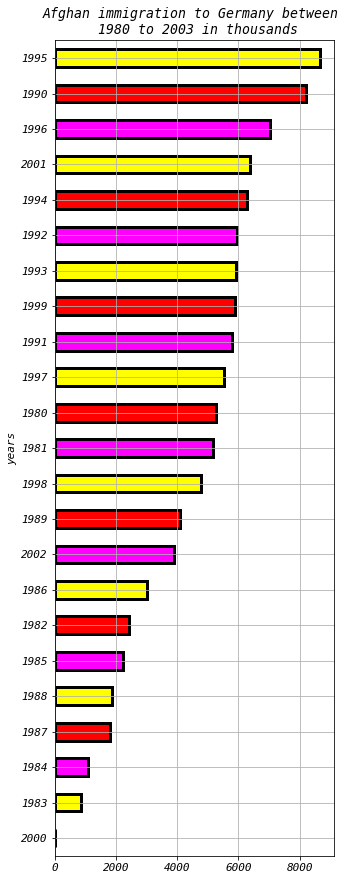

In [1021]:
afghanistan_ts[0:23].sort_values(by='immigrant_n').plot.barh(x='index', 
                                  y='immigrant_n', 
                                  legend=False, figsize=(5,15), edgecolor='black', linewidth=3,
                                  color=['red', 'yellow', 'magenta'], 
                                  title='Afghan immigration to Germany between \n 1980 to 2003 in thousands',
                                  grid=True) 
plt.ylabel('years')
plt.show()

### Japan

In [1022]:
japan_plot = japan_i.iloc[:, 5:japan_i.shape[1]-1].transpose()
print(type(japan_plot))
japan_plot.reset_index(level=0, inplace=True)

print(japan_plot.head())
# print(japan_plot.dtypes)

# print(type(japan_plot))
# print(japan_plot.shape)
# print(japan_plot['index'])
# rint(japan_plot.shape[1])

<class 'pandas.core.frame.DataFrame'>
Country index  Japan
0        1981   3757
1        1982   3733
2        1983   3659
3        1984   3731
4        1985   4060


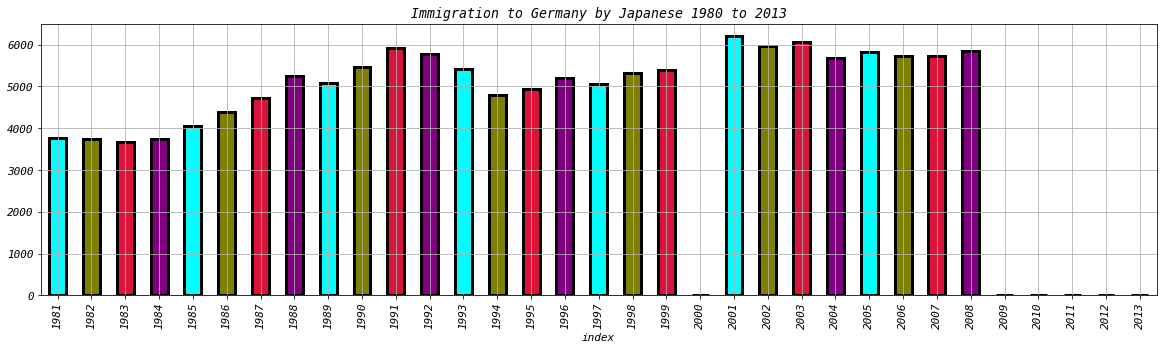

In [1023]:
japan_plot.plot.bar(x='index', y='Japan', legend=False, edgecolor='black', 
                    linewidth=3, figsize=(20,5), color=['cyan', 'olive', 'crimson', 'purple'],
                    title='Immigration to Germany by Japanese 1980 to 2013', grid=True)
plt.show()

### Republic of Korea

In [1024]:
korea = df_germany.loc['Republic of Korea']
korea

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Republic of Korea,Emigrants,Asia,Eastern Asia,Developing regions,1059,1045,1266,1245,1515,1293,...,2519,2472,2914,3654,0,0,0,0,0,46731
Republic of Korea,Immigrants,Asia,Eastern Asia,Developing regions,1906,2328,2089,1636,1658,2189,...,2788,3339,3706,3915,0,0,0,0,0,60007


<class 'pandas.core.frame.DataFrame'>
(34, 1)


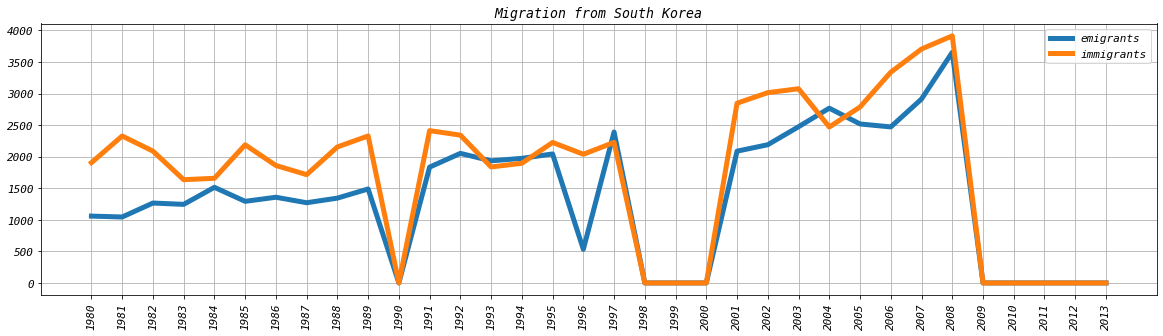

In [1025]:
kemi = korea[korea.loc[:, 'Type'] == 'Emigrants']
kemi = kemi.iloc[:,4:38].transpose()
kimi = korea[korea.loc[:, 'Type'] == 'Immigrants']
kimi = kimi.iloc[:,4:38].transpose()

# print(kemi)
# print(kemi.index)

print(type(kemi))
print(kemi.shape)

plt.figure(figsize=(20,5))

plt.plot(kemi.index, 'Republic of Korea', data=kemi, label='emigrants', linewidth=5)
plt.plot(kemi.index, 'Republic of Korea', data=kimi, label='immigrants', linewidth=5)
plt.xticks(rotation=90)
plt.legend()
plt.grid(which='both')
plt.title('Migration from South Korea')

plt.show()

In [1026]:
korea_yr = df_germany.loc['Republic of Korea', years]


      emigrants  immingrants
1980      71444       213258
1981      71615        84583
1982      87579        43137
1983     100977        28178
1984     213891        34536


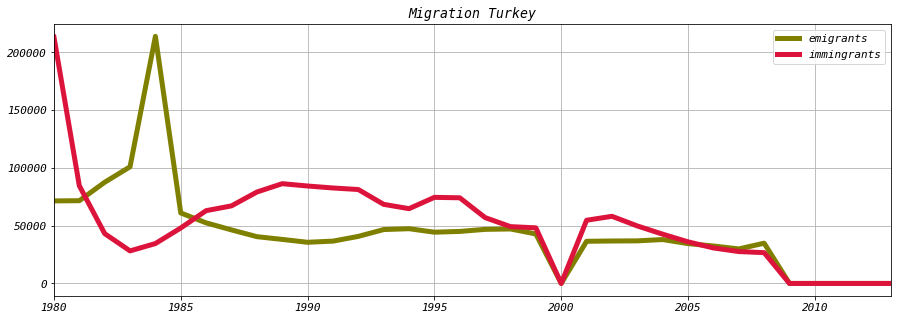

In [1027]:
turkey = df_germany.loc['Turkey', years].transpose()
turkey.columns = ['emigrants', 'immingrants']
print(turkey.head())
turkey.plot(figsize=(15,5), title="Migration Turkey", color=['olive', 'crimson'], linewidth=5, grid=True)
plt.grid(which='minor')
plt.show()

      emigrants  immingrants
1980      27927        41276
1981      49021        91418
1982      34120        37111
1983      36333        40189
1984      52859        67931


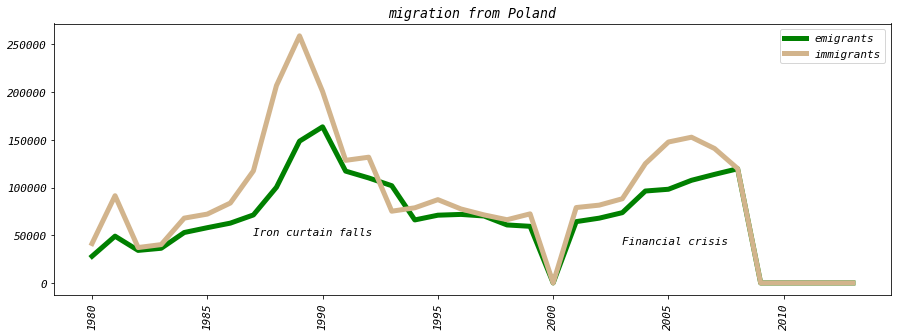

In [1028]:
poland = df_germany.loc['Poland', years].transpose()
poland.columns = ['emigrants', 'immingrants']
print(poland.head())

# poland index from string to int for using it as x-ticks

type(poland.index)
poland_index = poland.index.tolist()

poland_index_int =[]
for i in poland_index:
    g = int(i)
    poland_index_int.append(g)
    
poland_index_int[:4]

plt.figure(figsize=(15,5))
# syntax: plt.text(x, y, label)
plt.text(1987, 50000, 'Iron curtain falls')
plt.text(2003, 40000, 'Financial crisis')
plt.plot(poland_index_int, 'emigrants', data=poland, linewidth=5, 
         color='green', label='emigrants')
plt.plot(poland_index_int, 'immingrants', data=poland, linewidth=5, 
         color='tan', label='immigrants')
plt.xticks(rotation=90)
plt.title('migration from Poland')
plt.legend()


plt.show()

### Did the financial crisis influenced Iceland migration?

In [1029]:
# step 1: get the data
df_iceland = df_germany.loc['Iceland', years].transpose()

df_iceland.columns = ['Emigrants', 'Immigrants']
df_iceland.head()

,Emigrants,Immigrants
1980,144,140
1981,144,158
1982,128,155
1983,139,166
1984,146,179


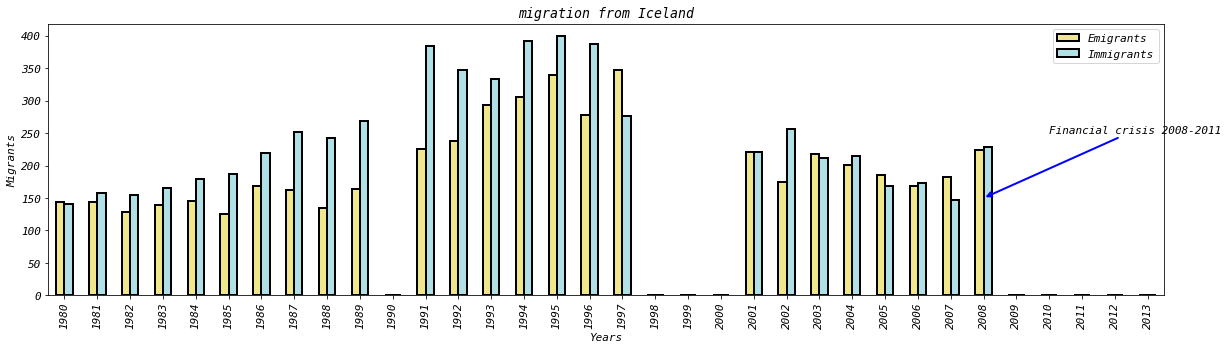

In [1030]:
df_iceland.plot(kind='bar', figsize=(20,5), edgecolor='black', linewidth=2, 
                color=['khaki', 'powderblue'], title='migration from Iceland')
plt.xlabel('Years')
plt.ylabel('Migrants')

plt.annotate('Financial crisis 2008-2011',  # s: str. Will leave it blank for no text
             xy=(28, 150),          
             xytext=(30, 250),  
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )


plt.show()

There is an increase in migration at 2008 but not decisive. Migration between Iceland and Germany is anyway not high.

## Distributions of single variables with histograms

In [1031]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_germany['2008'])

print(count) # frequency count
print(len(bin_edges))
print(bin_edges) # bin ranges, default = 10 bins

[359  12   5   1   1   0   0   0   0   2]
11
[     0.   11986.7  23973.4  35960.1  47946.8  59933.5  71920.2  83906.9
  95893.6 107880.3 119867. ]


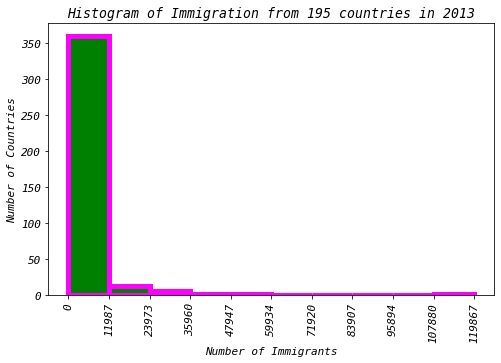

In [1032]:
df_germany['2008'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges, color=['green'], edgecolor='magenta', linewidth=5)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label
plt.xticks(rotation=90)

plt.show()


Most countries had an immigration to Germany within the first bin between 0 and 11987.

In [1033]:
count_kimi, bin_kimi = np.histogram(kimi)
print(count_kimi)
print(len(bin_edges))
print(bin_kimi)

kimi.head()

[9 0 0 0 7 9 2 4 1 2]
11
[   0.   391.5  783.  1174.5 1566.  1957.5 2349.  2740.5 3132.  3523.5
 3915. ]


Country,Republic of Korea
1980,1906
1981,2328
1982,2089
1983,1636
1984,1658


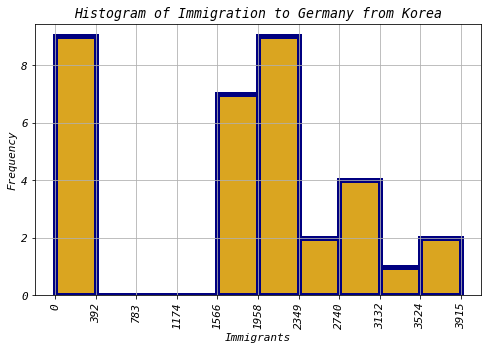

In [1034]:
kimi.plot(kind='hist', figsize=(8, 5), xticks=bin_kimi, color=['goldenrod'], edgecolor='navy', linewidth=5, legend=False, grid=True)

plt.title('Histogram of Immigration to Germany from Korea') # add a title to the histogram
plt.ylabel('Frequency') # add y-label
plt.xlabel('Immigrants') # add x-label
plt.xticks(rotation=90)

plt.show()

 Immigration to Germany from Korea was for every year mostly between 0 and 392 immigrants closely followed by between 1958 and 2349 immingrants.

In [1035]:
selected_countries = ["Poland", "Turkey", "Italy", "Romania", "Greece", "United States of America"]

df_selected_c = df_germany.loc[selected_countries]
select_immi = df_selected_c[df_selected_c.Type == 'Immigrants']
select_immi = select_immi[years].transpose()
print(select_immi.shape)
print(select_immi.iloc[:5,:])

(34, 6)
Country  Poland  Turkey  Italy  Romania  Greece  United States of America
1980      41276  213258  86585     5001   15882                     16059
1981      91418   84583  65285     5375   18554                     14866
1982      37111   43137  41444     4982   12849                     14373
1983      40189   28178  35712     4325    9970                     14455
1984      67931   34536  37514     4648    9387                     15760


In [1036]:
count_select, bin_select = np.histogram(select_immi)
print(count_select)
print(len(bin_select))
print(bin_select)

a = np.histogram(select_immi)

[116  41  18  16   5   4   0   2   1   1]
11
[     0.   25895.6  51791.2  77686.8 103582.4 129478.  155373.6 181269.2
 207164.8 233060.4 258956. ]


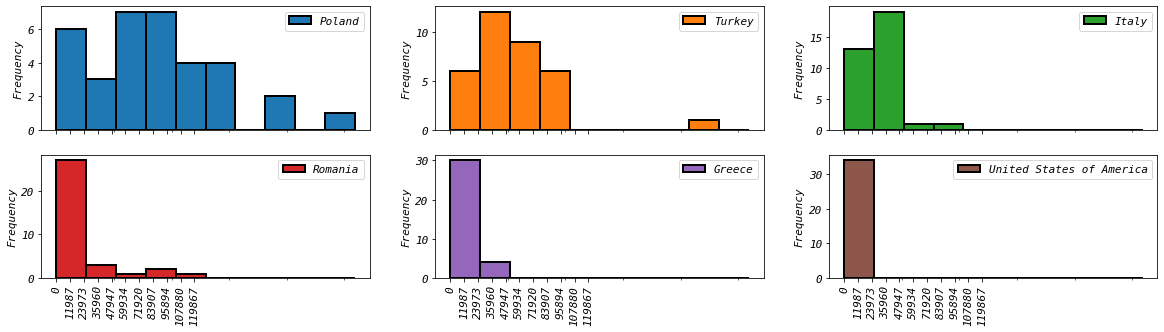

In [1037]:
select_immi.plot(kind = 'hist',subplots=True, layout = (2,3), figsize=(20,5), edgecolor='black', linewidth=2, xticks=bin_edges, rot=90)
plt.show()

### Compare multiple line plot with multiple histograms plot

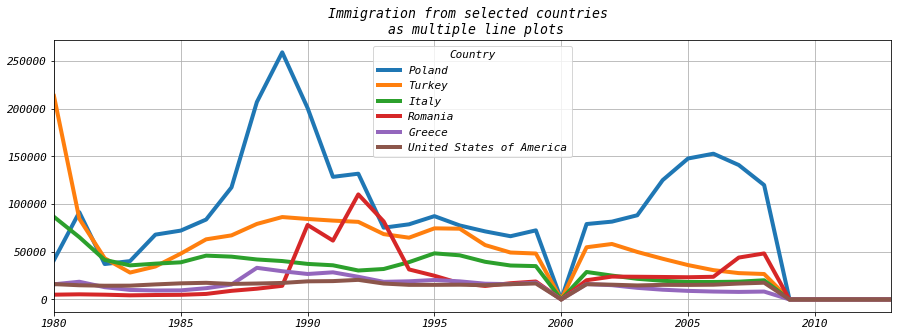

In [1038]:
ax = select_immi.plot(linewidth=4, figsize=(15,5), title='Immigration from selected countries \n as multiple line plots', grid=True)
# ax.grid(True, which='minor', linestyle='-', linewidth=0.25)
plt.show()

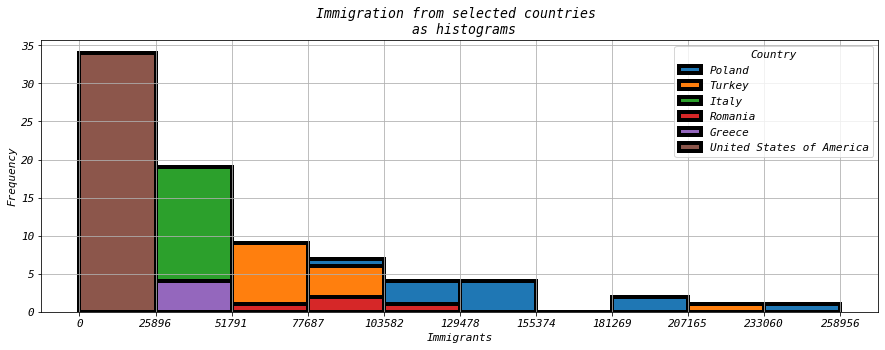

In [1039]:
ax = select_immi.plot(kind='hist', linewidth=4, figsize=(15,5), title='Immigration from selected countries \n as histograms', 
                      grid=True, edgecolor="black", xticks=bin_select)
plt.xlabel('Immigrants')
plt.ylabel('Frequency')
# ax.grid(True, which='minor', linestyle='-', linewidth=0.25)
plt.show()

Setting the alpha parameter making the bin transparent.

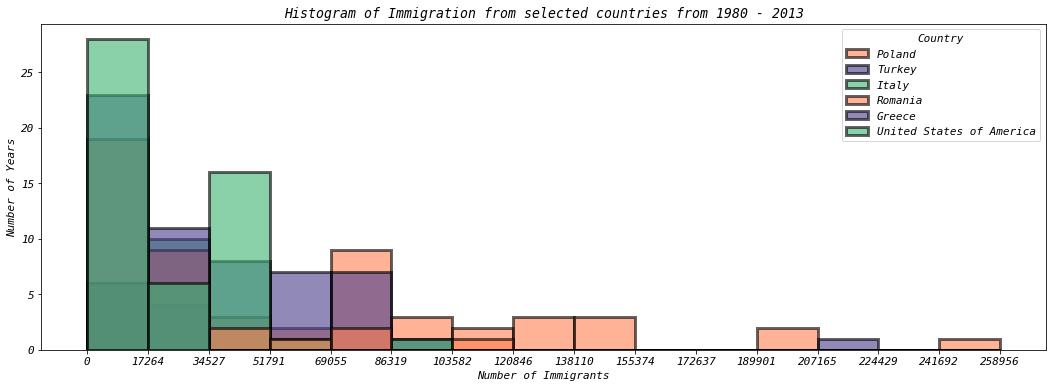

In [1040]:
# let's get the x-tick values
count, bin_edges = np.histogram(select_immi, 15)

# un-stacked histogram
select_immi.plot(kind ='hist', 
          figsize=(18, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          edgecolor='black',
          linewidth=3
         )

plt.title('Histogram of Immigration from selected countries from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

### Stacked histogram

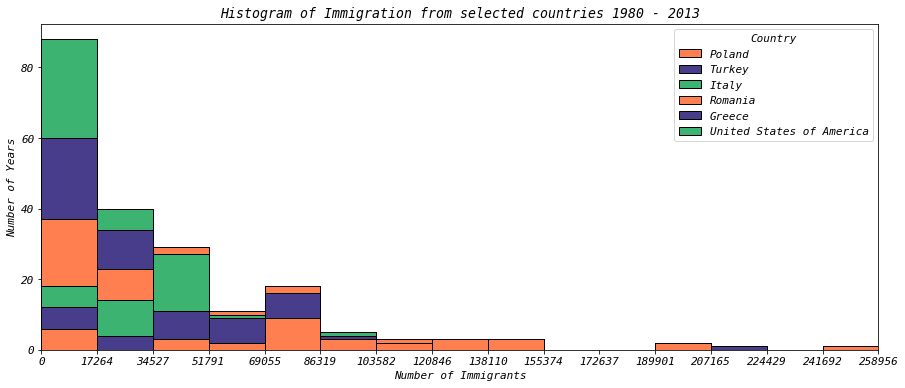

In [1041]:
count, bin_edges = np.histogram(select_immi, 15)
xmin = bin_edges[0] - 10   #  adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  ladding buffer of 10 for aesthetic purposes

# stacked Histogram
select_immi.plot(kind='hist',
          figsize=(15, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax),
          edgecolor='black'
         )

plt.title('Histogram of Immigration from selected countries 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

## Relationship between population and immigration

In [1042]:
print(len(years))
# print(years)
print(df_population.shape[0])

# print(df_population[0:34])
pop_2013 = df_population[0:34]
# print(pop_2013 )
# print(type(pop_2013))
# print(pop_2013.shape[0])
# print(pop_2013.columns)
# print(len((pop_2013.Population)))
# print(pop_2013.index)
# print(pop_2013.Population)


# print(only_immigration['Total'].shape[0])
#print(len(totalImmigration_year))
# print(totalImmigration_year.shape)
totalImmigration_year_2 = totalImmigration_year.reset_index()
print(totalImmigration_year_2.columns)
# print(totalImmigration_year_2.shape)
# print(totalImmigration_year_2.head())

34
39
Index(['index', 'totalImmigration_year'], dtype='object')


In [1043]:
popmig = pd.DataFrame({'years': years,
                       'population':pop_2013['Population'],  
                       'immigration': totalImmigration_year_2.totalImmigration_year})
popmig['years'] = popmig['years'].astype(int)
print(popmig.info())
popmig.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
years          34 non-null int32
population     34 non-null int64
immigration    34 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 808.0 bytes
None


,years,population,immigration
0,1980,78397483,579606.0
1,1981,78418324,459038.0
2,1982,78248407,294089.0
3,1983,78008156,252834.0
4,1984,77709213,307544.0


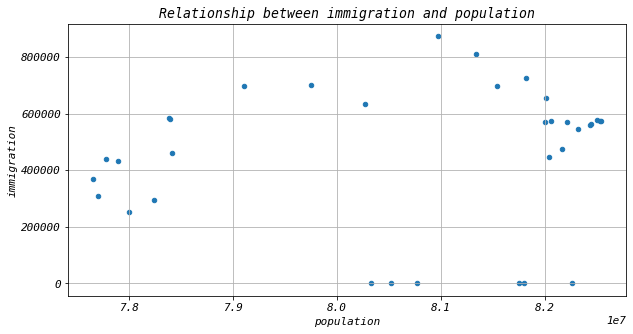

In [1044]:
popmig.plot(kind='scatter', x='population', y='immigration', figsize=(10,5), grid=True,
            title='Relationship between immigration and population')
plt.show()

#### Correlation

In [1045]:
popmig.corr()
# There is relative high correlation between population and years. The more years 
# the higher the population.

,years,population,immigration
years,1.000000,0.758954,-0.372722
population,0.758954,1.000000,0.119766
immigration,-0.372722,0.119766,1.000000


#### Regression from population to immigration

In [1046]:
independent_variable = popmig.population    # population on x-axis
dependent_variable = popmig.immigration  # immigration on y-axis
fit = np.polyfit(independent_variable, dependent_variable , deg=1)

slope = fit[0]
intercept = fit[1]

print(slope)
print(intercept)

0.01701304228753882
-915003.934126792


The linear regression equation is: y= a*x + b, where a is the slope and b is the intecept. The output of polyfit has 2 elements [ 1.70130423e-02, -9.15003934e+05] with the the slope in position 0 and intercept in position 1.

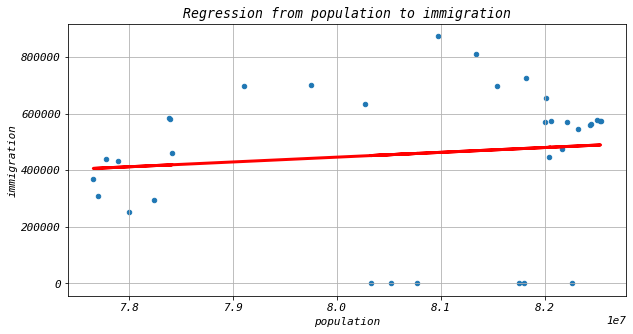

In [1047]:
popmig.plot(kind='scatter', x='population', y='immigration', figsize=(10,5), grid=True,
            title='Relationship between immigration and population')
plt.title('Regression from population to immigration')
plt.plot(independent_variable, slope* independent_variable + intercept, color='red', 
         linewidth=3)
plt.show()

Relationship between years and immigration like the time series above.

#### Regression from years to immigration

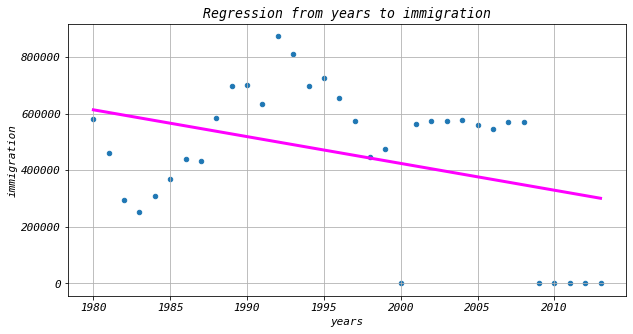

In [1048]:
fit_2 = np.polyfit(popmig.years, popmig.immigration, deg=1)
popmig.plot(kind='scatter', x='years', y='immigration', figsize=(10,5), grid=True)
plt.title('Regression from years to immigration')
plt.plot(popmig.years, fit_2[0]*popmig.years + fit_2[1], color='magenta', linewidth=3)
plt.show()

#### Regression from years to population

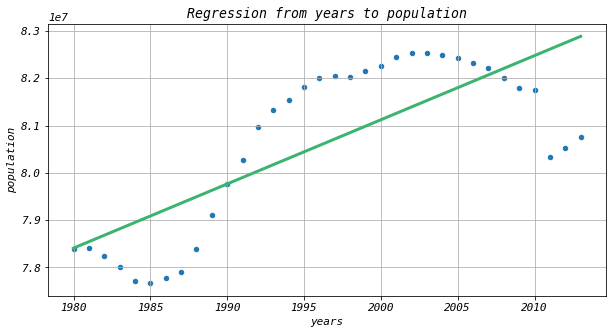

In [1049]:
fit_3 = np.polyfit(popmig.years, popmig.population, deg=1)
popmig.plot(kind='scatter', x='years', y='population', figsize=(10,5), grid=True)
plt.title('Regression from years to population')
plt.plot(popmig.years, fit_3[0]*popmig.years + fit_3[1], color='mediumseagreen', linewidth=3)
plt.show()

## Bubble plots

<p>
adding a third dimension to a scatter plot. The size of the markers or bubbles indicate the size
of the underlying value. In this case the number of immigrants. The plot function offers
an argument s for this. The weights of s are the normalized values of immigration.
</p> 

In [1050]:
# create the weights
immy_np = totalImmigration_year_2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
immi_scaled = min_max_scaler.fit_transform(immy_np) 
immi_scaled = pd.DataFrame(immi_scaled)
immi_weights = immi_scaled[1]

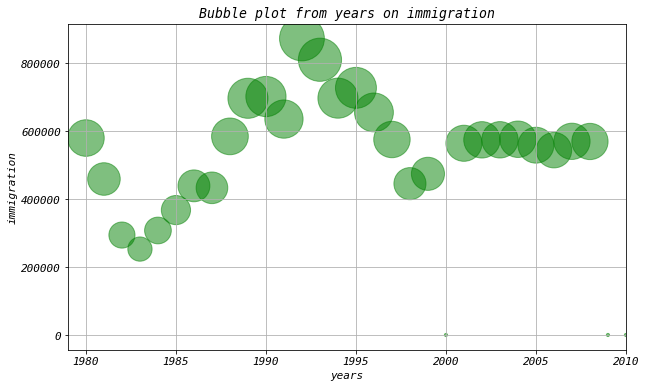

In [1051]:
# plot immigration dependent on years with s
popmig.plot(kind='scatter', 
            x='years', 
            y='immigration', 
            figsize=(10, 6),
            alpha=0.5,  # transparency
            color=['green'],
            s=immi_weights  * 2000 + 10,  # pass in weights 
            xlim=(1979, 2010), grid=True,
            title='Bubble plot from years on immigration')
plt.show()

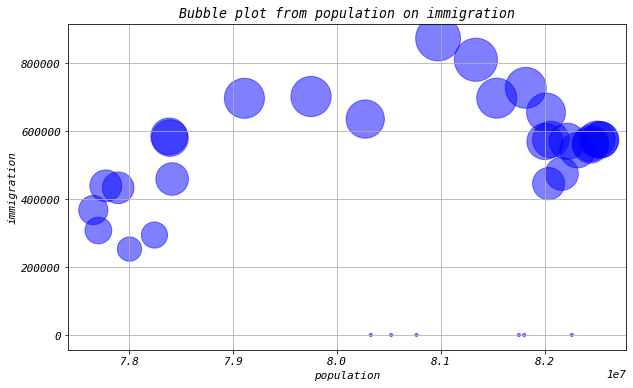

In [1052]:
# plot immigration dependent on population with s
popmig.plot(kind='scatter', x='population', y='immigration', 
            figsize=(10, 6),
            alpha=0.5,
            color="blue",
            s=immi_weights  * 2000 + 10,  # pass in weights 
            grid=True,
            title='Bubble plot from population on immigration')
plt.show()

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year.

# Generating maps of Germany

In [1053]:
# using df_germany_countries above and preparing the data
df_germany_countries.columns = list(map(str, df_germany_countries.columns))
# add total column
df_germany_countries['Total'] = df_germany_countries.sum(axis=1)
# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
# check the data
print ('data dimensions:', df_germany_countries.shape)
print(df_germany_countries.columns[:5])
print(df_germany_countries.Type.unique())
# extract immigrants
df_c_immi = df_germany_countries.loc[df_germany_countries.Type=='Immigrants',:]
print(df_c_immi.Type.unique())

data dimensions: (383, 40)
Index(['Type', 'Country', 'Continent', 'Region', 'DevName'], dtype='object')
['Emigrants' 'Immigrants']
['Immigrants']


## Define the world map

In [1054]:
world_map = folium.Map()

# display world map
world_map

## Center world map around Germany

<p>
The default definition of the world map is customized by specifying the centre with the Latitude and Longitude values of the map and the intial zoom level. All locations on a map are defined by their respective Latitude and Longitude values and pass in a center  of [0, 0]. The higher the zoom level the more the map is zoomed into the center.
</p> 


In [1055]:
# Germany: longitude: 51.1657° N, latitude: 10.4515° E
# zoom level 4
germany_map_4 = folium.Map(location=[51.1657, 10.4515], zoom_start=4)

# display world map
germany_map_4

In [1056]:
# Germany: longitude: 51.1657° N, latitude: 10.4515° E
# same map but zoom level 8
germany_map_8 = folium.Map(location=[51.1657, 10.4515], zoom_start=8)

# display world map
germany_map_8

## Choropleth Map of the world depicting immigrant countries towards Germany


<p>
A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area or it shows the level of variability within a region. Below is a `Choropleth` map of the world depicting the immigration towards Germany.
</p> 

<p>
The darker the color of a country and the closer the color to red, the higher the number of immigrants from that country. 
</p> 



In [1057]:
# download countries geojson file
# !wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
# print('GeoJSON file downloaded!')

In [1058]:
# world_geo = r'world_countries.json' # geojson file

# import json file
world_geo_2 = r'world_countries_2.json' # geojson file

# use pandas to check data
world_geo_pd = pd.read_json(world_geo_2)
# print(world_geo_pd.head())

# create an empty [0, 0] plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

In [1059]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo_2,
    data=df_c_immi,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Germany'
)

# display map
world_map